In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [2]:
X_train = np.loadtxt('input.csv', delimiter=',')
Y_train = np.loadtxt('labels.csv', delimiter=',')

X_test = np.loadtxt('input_test.csv', delimiter=',')
Y_test = np.loadtxt('labels_test.csv', delimiter=',')

In [3]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [4]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


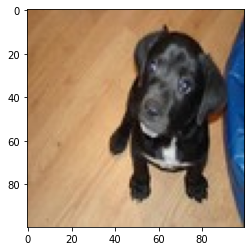

In [5]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)),   
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation='relu'),   
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid') 
])

In [7]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model.fit(X_train, Y_train, epochs=10, batch_size=64)

Epoch 1/10
32/32 [==============================] - 8s 226ms/step - loss: 0.7175 - accuracy: 0.5115
Epoch 2/10
32/32 [==============================] - 7s 229ms/step - loss: 0.6753 - accuracy: 0.5900
Epoch 3/10
32/32 [==============================] - 8s 234ms/step - loss: 0.6309 - accuracy: 0.6365
Epoch 4/10
32/32 [==============================] - 8s 262ms/step - loss: 0.5630 - accuracy: 0.7240
Epoch 5/10
32/32 [==============================] - 9s 290ms/step - loss: 0.5043 - accuracy: 0.7535
Epoch 6/10
32/32 [==============================] - 11s 354ms/step - loss: 0.4907 - accuracy: 0.7650
Epoch 7/10
32/32 [==============================] - 12s 391ms/step - loss: 0.4058 - accuracy: 0.8205
Epoch 8/10
32/32 [==============================] - 10s 323ms/step - loss: 0.3612 - accuracy: 0.8445
Epoch 9/10
32/32 [==============================] - 9s 295ms/step - loss: 0.3086 - accuracy: 0.8715
Epoch 10/10
32/32 [==============================] - 10s 320ms/step - loss: 0.2417 - accuracy: 0.

In [10]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 39ms/step - loss: 0.6558 - accuracy: 0.6900


[0.6558467149734497, 0.6899999976158142]

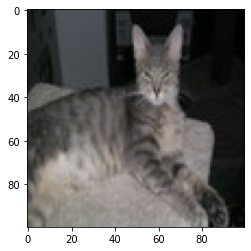

1/1 [==============================] - 0s 22ms/step
Our model says it is a: cat


In [18]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

Y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
Y_pred = Y_pred > 0.5

if(Y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a:", pred)